In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import Recall
from tensorflow.keras.metrics import Recall, FalseNegatives, Precision, AUC, Accuracy
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

**1. Data Loading**

In [3]:
df = pd.read_csv('ex4_data.csv')
df

,INTENSIVE,NEWSITEID,RISK10YRS,INCLUSIONFRS,SBP,DBP,N_AGENTS,NOAGENTS,SMOKE_3CAT,ASPIRIN,...,RACE4,CHR,GLUR,HDL,TRR,UMALCR,BMI,STATIN,SBPTERTILE,EVENT_PRIMARY
0,Regular,74.0,29.732061,True,145,80,2,False,3,True,...,WHITE,155,81,36,92,5.80,33.115201,True,3,False
1,Regular,8.0,29.677619,True,138,71,1,False,2,True,...,WHITE,243,107,61,188,5.45,28.842380,True,2,False
2,Intensive,25.0,17.443819,True,143,92,2,False,2,False,...,WHITE,180,116,47,125,13.33,33.643060,False,2,False
3,Regular,96.0,8.627849,False,123,68,2,False,1,False,...,WHITE,234,93,89,109,6.12,29.337871,False,1,False
4,Intensive,42.0,23.751437,True,126,51,2,False,2,False,...,WHITE,126,108,39,84,28.78,36.660286,False,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8741,Regular,102.0,10.896486,False,138,59,2,False,2,True,...,WHITE,199,90,85,74,12.73,27.186534,True,2,False
8742,Regular,98.0,8.646088,False,119,73,3,False,2,False,...,WHITE,145,83,52,95,440.38,42.191997,True,1,False
8743,Regular,99.0,24.191491,True,137,75,0,True,2,False,...,WHITE,167,80,46,75,26.92,19.462021,True,2,False
8744,Intensive,15.0,20.354619,True,154,93,0,True,2,True,...,WHITE,245,103,37,369,3.20,35.579436,False,3,False


Convert boolean variables to integers

In [4]:
df["INCLUSIONFRS"] = df["INCLUSIONFRS"].astype(int)
df["NOAGENTS"] = df["NOAGENTS"].astype(int)
df["ASPIRIN"] = df["ASPIRIN"].astype(int)
df["SUB_CKD"] = df["SUB_CKD"].astype(int)
df["RACE_BLACK"] = df["RACE_BLACK"].astype(int)
df["FEMALE"] = df["FEMALE"].astype(int)
df["SUB_CVD"] = df["SUB_CVD"].astype(int)
df["SUB_CLINICALCVD"] = df["SUB_CLINICALCVD"].astype(int)
df["SUB_SUBCLINICALCVD"] = df["SUB_SUBCLINICALCVD"].astype(int)
df["SUB_SENIOR"] = df["SUB_SENIOR"].astype(int)
df["STATIN"] = df["STATIN"].astype(int)
df["EVENT_PRIMARY"] = df["EVENT_PRIMARY"].astype(int)


 Convert categorical variables to integers

In [5]:
#object to category to int
c = pd.Categorical(df['INTENSIVE'])
df['INTENSIVE']=c
df['INTENSIVE'] = df.INTENSIVE.cat.codes
c = pd.Categorical(df['RACE4'])
df['RACE4']=c
df['RACE4'] = df.RACE4.cat.codes
df

,INTENSIVE,NEWSITEID,RISK10YRS,INCLUSIONFRS,SBP,DBP,N_AGENTS,NOAGENTS,SMOKE_3CAT,ASPIRIN,...,RACE4,CHR,GLUR,HDL,TRR,UMALCR,BMI,STATIN,SBPTERTILE,EVENT_PRIMARY
0,1,74.0,29.732061,1,145,80,2,0,3,1,...,3,155,81,36,92,5.80,33.115201,1,3,0
1,1,8.0,29.677619,1,138,71,1,0,2,1,...,3,243,107,61,188,5.45,28.842380,1,2,0
2,0,25.0,17.443819,1,143,92,2,0,2,0,...,3,180,116,47,125,13.33,33.643060,0,2,0
3,1,96.0,8.627849,0,123,68,2,0,1,0,...,3,234,93,89,109,6.12,29.337871,0,1,0
4,0,42.0,23.751437,1,126,51,2,0,2,0,...,3,126,108,39,84,28.78,36.660286,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8741,1,102.0,10.896486,0,138,59,2,0,2,1,...,3,199,90,85,74,12.73,27.186534,1,2,0
8742,1,98.0,8.646088,0,119,73,3,0,2,0,...,3,145,83,52,95,440.38,42.191997,1,1,0
8743,1,99.0,24.191491,1,137,75,0,1,2,0,...,3,167,80,46,75,26.92,19.462021,1,2,0
8744,0,15.0,20.354619,1,154,93,0,1,2,1,...,3,245,103,37,369,3.20,35.579436,0,3,0


Replacing null values with the average of each column

In [6]:
df = df.apply(lambda x: x.fillna(x.mean())) 

Separate the column we want to predict

In [7]:
Y = df['EVENT_PRIMARY']
df=df.drop(columns=['EVENT_PRIMARY'])

Split to train and test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=1/3, random_state=1, stratify=Y)

Data normalization

In [9]:
#Normalize the data according to the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

**2. Models**

**Linear classifier model: Logistic Regression**

This model uses a regression method to solve binary classification problems using a logistic function.

We chose this model because it solves binary classification and our target column "EVENT_PRIMARY" is binary. In addition, in this dataset, there are many more cases of 'false' (0) than 'true'(1) in our target column. therefore, we need to balance it. In Logistic Regression there is a 'class_weight' parameter that increases the class_weight of class 0 relative to class 1.

In [10]:
clf = LogisticRegression()

parameters = {'class_weight': ['balanced'],
              'max_iter':[100,500, 1000] ,
              'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C':[0.001,0.09,1,5,10]
              }
warnings.filterwarnings('ignore')
# Type of scoring used to compare parameter combinations: Recall
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters,scoring=scorer, return_train_score=True)
grid_obj = grid_obj.fit(X_train, y_train)



In [11]:
grid_obj.best_params_

{'C': 0.001,
 'class_weight': 'balanced',
 'max_iter': 500,
 'penalty': 'l1',
 'solver': 'saga'}

In [12]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', max_iter=500, penalty='l1',
                   solver='saga')

In [13]:
def scores(test, predict):
  d = {}
  d['Accuracy'] = accuracy_score(test, predict)
  d['Recall'] = recall_score(test, predict)
  d['Precision'] = precision_score(test, predict)
  d['ROC AUC'] = roc_auc_score(test, predict)

  return d

In [14]:
LR_scores = scores(y_test, clf.predict(X_test))
LR_scores_train = scores(y_train, clf.predict(X_train))

Does the model overfit?

In [15]:
print('Testing Error: '+str(1-accuracy_score(y_test, clf.predict(X_test))))
print('Train Error: '+str(1-accuracy_score(y_train, clf.predict(X_train))))

print('Test Scores'+str(LR_scores))
print('Train Scores'+str(LR_scores_train))

Testing Error: 0.9382716049382716
Train Error: 0.9384219554030875
Test Scores{'Accuracy': 0.06172839506172839, 'Recall': 1.0, 'Precision': 0.06172839506172839, 'ROC AUC': 0.5}
Train Scores{'Accuracy': 0.061578044596912525, 'Recall': 1.0, 'Precision': 0.061578044596912525, 'ROC AUC': 0.5}


Overfitting may have occurred if the testing error is greater than the training error.

In our model, the testing error is 0.361 and the training error is 0.365 I.e. the errors are close therefore the model doesn't overfit.
In addition, for each evaluation method, the train score is close to the test score. therefore the model doesn't overfit.

**Ensemble model: Random Forest Classifier**

This model is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

For classification tasks, the output of the random forest is the class selected by most trees.

We chose this model because in this dataset there are many more cases of 'false' (0) than 'true'(1) in the target column therefore we need to balance it. In the Random Forest model, there is a 'class_weight' parameter that increases the class_weight of class 0 relative to class 1.


In [16]:
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 7, 9],
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8],
               'class_weight': ['balanced']}

# Type of scoring used to compare parameter combinations: Recall
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters,scoring=scorer, return_train_score=True)
grid_obj = grid_obj.fit(X_train, y_train)
print(grid_obj.best_params_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 4}


In [17]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=2, min_samples_leaf=8, min_samples_split=3,
                       n_estimators=4)

In [18]:
RF_scores = scores(y_test, clf.predict(X_test))
RF_scores_train = scores(y_train, clf.predict(X_train))

The model overfit?

In [19]:
print('Test Error: '+str(1-accuracy_score(y_test, clf.predict(X_test))))
print('Train Error: '+str(1-accuracy_score(y_train, clf.predict(X_train))))
print('Test Scores'+str(RF_scores))
print('Train Scores'+str(RF_scores_train))

Test Error: 0.34259259259259256
Train Error: 0.3523156089193825
Test Scores{'Accuracy': 0.6574074074074074, 'Recall': 0.5555555555555556, 'Precision': 0.09813542688910697, 'ROC AUC': 0.6098318713450293}
Train Scores{'Accuracy': 0.6476843910806175, 'Recall': 0.6044568245125348, 'Precision': 0.10192578675434476, 'ROC AUC': 0.6274888765223979}


Overfitting may have occurred if the testing error is greater than the training error.

In our model, the testing error is 0.293 and the training error is 0.306 I.e. the errors are close therefore the model doesn't overfit.

In addition, for each evaluation method, the training score is close to the test score therefore the model doesn't overfit.

**Deep Learning model: Sequential**

This model is a fully connected neuron network that consists of at least three layers: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

We chose this model because it solves binary classification and our target column "EVENT_PRIMARY" is binary. In addition in this model, we got better results than in other models.


In [20]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

In [21]:
tf.keras.backend.clear_session()
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=29, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Recall(), Precision(), AUC()])

# fit the keras model on the dataset
history = model.fit(x=X_train, y=y_train1, batch_size=10, epochs=30, validation_split=1/3,  workers=-1)

Epoch 1/30
389/389 [==============================] - 3s 4ms/step - loss: 0.3380 - accuracy: 0.9297 - recall: 0.9295 - precision: 0.9297 - auc: 0.9407 - val_loss: 0.2430 - val_accuracy: 0.9372 - val_recall: 0.9372 - val_precision: 0.9372 - val_auc: 0.9476
Epoch 2/30
389/389 [==============================] - 1s 3ms/step - loss: 0.2487 - accuracy: 0.9390 - recall: 0.9390 - precision: 0.9390 - auc: 0.9457 - val_loss: 0.2319 - val_accuracy: 0.9372 - val_recall: 0.9372 - val_precision: 0.9372 - val_auc: 0.9534
Epoch 3/30
389/389 [==============================] - 1s 3ms/step - loss: 0.2326 - accuracy: 0.9390 - recall: 0.9390 - precision: 0.9390 - auc: 0.9514 - val_loss: 0.2280 - val_accuracy: 0.9372 - val_recall: 0.9372 - val_precision: 0.9372 - val_auc: 0.9539
Epoch 4/30
389/389 [==============================] - 1s 3ms/step - loss: 0.2299 - accuracy: 0.9390 - recall: 0.9390 - precision: 0.9390 - auc: 0.9517 - val_loss: 0.2261 - val_accuracy: 0.9372 - val_recall: 0.9372 - val_precision: 0

In [22]:
test_scores = model.evaluate(X_test, y_test1, verbose=0)[1:]
train_scores = model.evaluate(X_train, y_train1, verbose=0)[1:]

The model overfit?

In [23]:
print('Testing Error: '+str(1-test_scores[0]))
print('Train Error: '+str(1-train_scores[0]))

print('Test Scores'+str(test_scores))
print('Train Scores'+str(train_scores))

Testing Error: 0.06310015916824341
Train Error: 0.06157803535461426
Test Scores[0.9368998408317566, 0.9368998408317566, 0.9368998408317566, 0.9522477984428406]
Train Scores[0.9384219646453857, 0.9384219646453857, 0.9384219646453857, 0.968471109867096]


Overfitting may have occurred if the testing error is greater than the training error.

In our model, the testing error is 0.062 and the training error is 0.061 I.e. the errors are close therefore the model doesn't overfit.

In addition for each evaluation method the training score is close to the test score therefore the model doesn't overfit.

**In the DL model, what's the effect of batch size? In general, and do you see this effect in the current task?**

Batch size controls the accuracy of the estimated error of the gradient when training neural networks. On one hand, a small batch size can converge faster than a large batch, but a large batch can reach optimum minima that a small batch size cannot reach. However, too large of a batch size will lead to poor generalization. Also, a small batch size can have a significant regularization effect because of its high variance, but it will require a small learning rate to prevent it from overshooting the minima.

We saw this effect in this task when we were fine-tuning the model parameters- When the batch size was very large(10,000) we got worse results. When the batch size was very small(1) the run time of all the epochs was very long but we got good results already in the first epochs (rapid convergence). When the batch size was around 500 we got good results with fast calculation time.

3. **comparison between the models:**

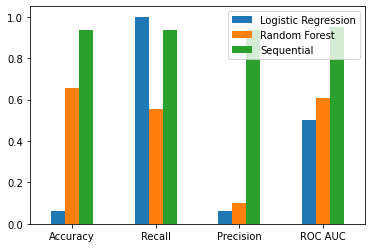

In [24]:
df = pd.DataFrame({'Logistic Regression': LR_scores.values(),
                   'Random Forest': RF_scores.values(),
                   'Sequential': test_scores},
                  index=LR_scores.keys())
df.plot.bar(rot=0)



We received in model "Sequential" the highest indices in each of the evaluation methods.

In models "LR" and "RF":
 
The "Precision" score is very low i.e small chance of being sick\dead provided the prediction is positive(low quality).

However, the "Recall" scores are larger i.e larger chance of predicting is positive provided being sick\dead(large quantity).

The "ROC AUC" scores are larger i.e large "Sensitivity" and large Specificity (small (1-Specificity) ).
"Sensitivity" - The test is positive provided the patient has a disease
"Specificity" - The test is negative provided the patient does not has a disease)

Although the accuracy is high in all of the models, it is not a good enough measure for the above dataset because the data is unbalanced(more false than true in the target column). For example, if we determined that the prediction is always "false", we will usually be right, so the accuracy will be high, even though we missed important illness/death cases.

In our opinion, the most important evaluation method is "Recall" for this dataset because we want to get positive predictions provided the patient has a disease. Therefore we chose parameters in the models that increase this score.
